<a href="https://colab.research.google.com/github/Janvithakur/AI-and-ML/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [7]:
k_values = [1, 3, 5, 7, 9]
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")



K=1, Accuracy=0.97
K=1, Accuracy=0.97
K=3, Accuracy=1.00
K=3, Accuracy=1.00
K=5, Accuracy=1.00
K=5, Accuracy=1.00
K=7, Accuracy=1.00
K=7, Accuracy=1.00
K=9, Accuracy=1.00
K=9, Accuracy=1.00


In [10]:
k_values = [1, 3, 5, 7, 9]
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")



K=1, Accuracy=0.97
K=3, Accuracy=1.00
K=5, Accuracy=1.00
K=7, Accuracy=1.00
K=9, Accuracy=1.00


  # Removed the redundant calculation and append of accuracy
  

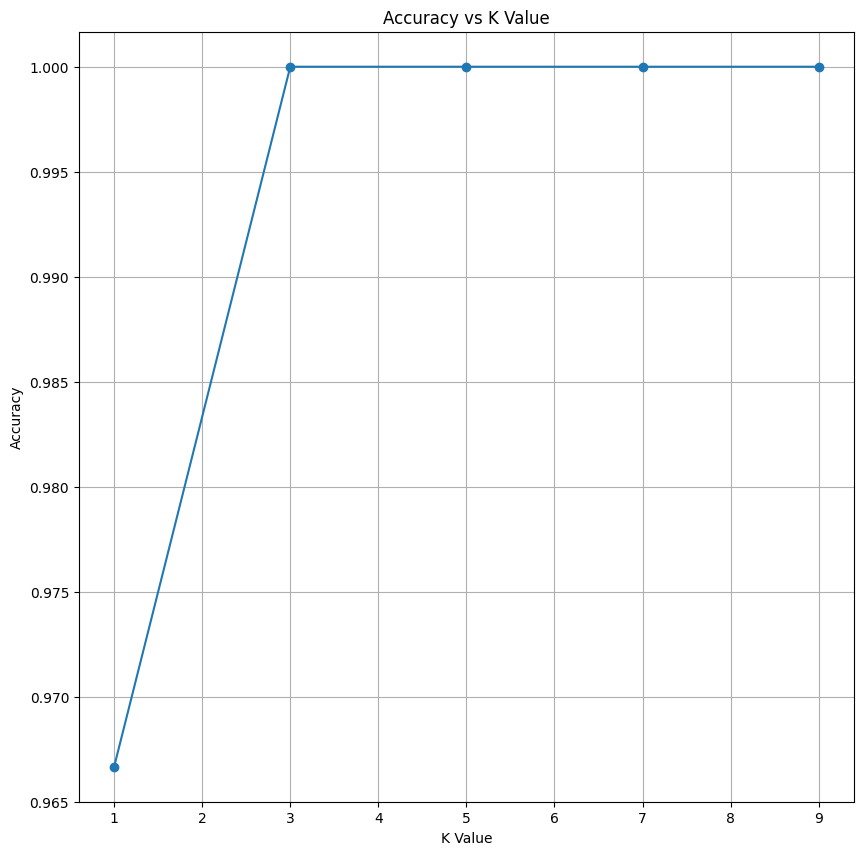

In [17]:
plt.figure(figsize=(10,10))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [18]:
best_k = 3
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

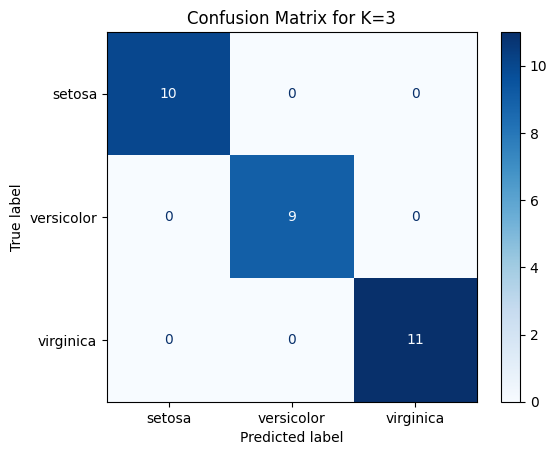

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for K={best_k}')
plt.show()
plt.figure(figsize=(10,10))

In [22]:
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]  # First two features for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

model_vis = KNeighborsClassifier(n_neighbors=best_k)
model_vis.fit(X_train_vis, y_train_vis)


KNeighborsClassifier(n_neighbors=3)

MESH GRID FOR PLOTTING

In [23]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


PREDICTING LABELS FOR EACH POINT

In [24]:
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


PLOT

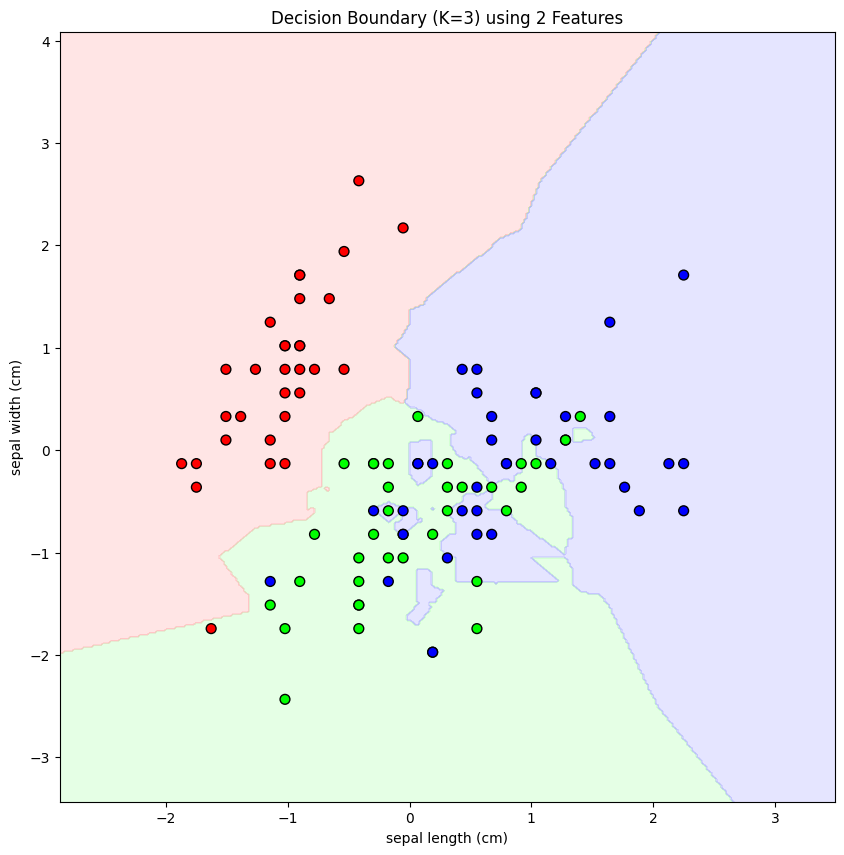

In [26]:
plt.figure(figsize=(10,10))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=cmap_bold, edgecolor='k', s=50)
plt.title(f'Decision Boundary (K={best_k}) using 2 Features')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()